# Collecting and Using Data in Python

## Laila A. Wahedi, PhD
### Massive Data Institute Postdoctoral Fellow <br>McCourt School of Public Policy<br>

### Follow along: 
* Slides: http://Wahedi.us, Tutorials
* Interactive Notebook: https://notebooks.azure.com/Laila/projects/mdi-network-analysis-workshop


# Following Along
1. Go to https://notebooks.azure.com/Laila/libraries/MDI-workshopFA18
2. Clone the directory
3. Sign in with any Microsoft Account (Hotmail, Outlook, Azure, etc.)
 * Create a folder to put it in, mark as public or private


* Azure Notebooks are standard Jupyter notebooks hosted by Microsoft Azure
* If you want to install Jupyter on your own machine (NOT NOW): 
  * Install the Anaconda distribution of Python
  https://www.anaconda.com/download/
  * Install Jupyter Notebooks
  http://jupyter.org/install

### What even is this thing?
* Jupyter Notebook is a coding environment that allows you to run snippits of code, interspaced with notes that are formatted in markdown. This makes it easy to explore and present data because you can view your results in-line with your code. 
### Here is a map of what you're looking at:

<img src='https://notebooks.azure.com/Laila/libraries/MDI-workshopFA18/raw/notebook.png'>
<br>

* This is a markdown cell. Click on it to see the markdown formatting. 
* Run the cell to see it look pretty again. 
* Ctrl/Apple+enter runs the cell
* Just run the cell to go from the raw form to the markdown pretty output

## Your environment is persistent.

* Persistent memory
  * If you run a cell, results remain as long as the kernel

### ORDER MATTERS!
Run the following two cells, in order. 

In [1]:
foo = 'some variable content'

In [2]:
print(foo)

some variable content


### See? foo still contains your data
* If your kernel dies, your data are gone
* Not R or Stata, you can't save your whole environment
* Data in memory more than spreadsheets, have to decide how to record it.
* Think carefully about what you want to save and how.
## Easy Saving: Pickle Package
* dump to save the data to hard drive (out of memory)
* Contents of the command:
  * variable to save,
  * File to dump the variable into: 
    * open(<br>
    "name of file in quotes",<br>
    "wb") "Write Binary"
    
* Note: double and single quotes both work

In [4]:
mydata = [1,2,3,4,5,6,7,8,9,10]
pickle.dump(mydata, open('mydata.p','wb'))
mydata = pickle.load(open("mydata.p","rb"))

# Pickle just saves your variable and you can save it as whatever you want
# Opening is rb and saving is wb! Pay extra attention or otherwise it will overwrite!!!

Run the below cell to get your environment ready:
(Azure will take a minute to install and import the relevant packages, we'll learn more about each one soon)

In [57]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# What is a network?
* Nodes/ Vertices (that are joined with...)
* Links/ edges/ ties/ arcs
* Weights
* Also called a graph
# Any Relationship or Interaction
## Examples
* People linked by friendship
* People linked by acquaintance
* People who shop at the same store
* Stores in the same zip code
* Stores with the same distributor
* Movies with the same actors
* Words in the same sentence

# Bipartite: Networks with two types of node
* People and the stores they shop in
* Movies and actors 
* Words and authors (often used in text analysis)
* What are some other examples?

* Weighted networks adds in numbers. Linked based on distance between homes or number of retweets 

# Directed Networks: 
### Edges are not always symmetrical
* Twitter user @Ahmad may retweet @Bethany more often than @Bethany retweets Ahmad
* Mexico buys from the US more than the US buys from Mexico
* User mentions on Twitter
* Outgoing phone calls between people
* Friendship rankings: Bobathy may list Amira as a friend on a survey without Amira listing Bobathy

#### Weighted and directed networks are related. Which are weighted and which are unweighted? 
#### When are weighted networks not directed? 

# Representing a Network: Edge List
* Dyads (Order matters in directed network but not in undirected network)
* Each row contains a pair of nodes indicating a tie
* A Third Column Cindicates weight
* Order may indicate direction of edge

In [18]:
edges = [('Fred', 'Maria'),
         ('Fred', 'Samir'),
         ('Fred', 'Jose',),
         ('Maria', 'Sonya',),
         ('Samir','Jose'),
         ('Samir','Sonya'),]

# Make this a weighted, undirected network

In [6]:
edges_weighted = [('Fred', 'Maria', 1),
         ('Fred', 'Samir', 2),
         ('Fred', 'Jose', 3),
         ('Maria', 'Sonya', 4),
         ('Samir','Jose', 5),
         ('Samir','Sonya', 6),]

# Maybe this is the number of times Samir, Sonya had a phone call or intensity of heartbeats when near each other. 

[('Fred', 'Maria', 1),
 ('Fred', 'Samir', 2),
 ('Fred', 'Jose', 3),
 ('Maria', 'Sonya', 4),
 ('Samir', 'Jose', 5),
 ('Samir', 'Sonya', 6)]

# What would you need to do to make this directed?

In [8]:
edges_directed =[('Fred', 'Maria', 3),
         ('Fred', 'Samir', 6),
         ('Fred', 'Jose', 2),
         ('Maria', 'Sonya', 1),
         ('Samir','Jose', 3),
         ('Samir','Sonya', 5),
         ('Maria', 'Fred', 2),
         ('Samir', 'Fred', 4),
         ('Jose', 'Fred', 6),
         ('Sonya','Maria', 3),
         ('Jose','Samir', 3)]
# It would go from Fred to Maria, and not two-way (i.e. let's say Fred lists Maria as his best friend but maria lists Fred as 5th best)
# Even if two entities have the same ranking, once you've set it out to be directed, you have to list both sides. Dyadic analysis might...
# want 0s because dropping all of them could create bias
# You can exclude if there's no weight or set to 0: Depends. 

# Representing a network: Adjacency Matrix
* nxn matrix of nodes, where position i,j indicates relationship between node i and node j
 * Index position corresponds with nodes. Keep the order straight
* Can be symmetrical or directed, use weights or indicators with 1
* Less space efficient for sparse networks, but convenient for linear algebra operations
* Use Numpy package, imported as np to make matrices
 * Index as (row, column)
* Why: Do matrix operations on whole network

# Representing a network: Adjacency Matrix

In [17]:
adj = np.zeros((5,5))
edge_index = [(0,1),(0,2),(0,3),
     (1,0),(1,4),
     (2,0),(2,3),(2,4),
     (3,0),(3,2),
     (4,1),(4,2)]
for p in edge_index: 
    adj[p] = 1
adj

array([[0., 1., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0.]])

# Representing a network: Adjacency Matrix
* To keep your labels, use the Pandas package, imported as pd

In [11]:
nodes = ['Fred','Maria','Samir','Jose','Sonya',]
adj_labeled = pd.DataFrame(adj,columns=nodes,index=nodes)
adj_labeled

,Fred,Maria,Samir,Jose,Sonya
Fred,0.0,1.0,1.0,1.0,0.0
Maria,1.0,0.0,0.0,0.0,1.0
Samir,1.0,0.0,0.0,1.0,1.0
Jose,1.0,0.0,1.0,0.0,0.0
Sonya,0.0,1.0,1.0,0.0,0.0


# What research are you interested in? 
# How might we construct a network from it? 

# Representing A network in Python: Networkx Object
* Using the networkx package, imported as nx
* Package designed to hold network data, visualize it, and to perform basic exploratory analysis

# Instantiating Our Network
* Declare a graph object
* Graph is another term for network
* Add your nodes or vertices
* Add your edges from an edgelist

In [19]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
G

# View Your Data:
### Who is in your network?
### Who is friends with who?

In [20]:
print(G.nodes)

['Fred', 'Maria', 'Samir', 'Jose', 'Sonya']


In [21]:
G.edges()

EdgeView([('Fred', 'Maria'), ('Fred', 'Samir'), ('Fred', 'Jose'), ('Maria', 'Sonya'), ('Samir', 'Jose'), ('Samir', 'Sonya')])

# View Your Data:
### Who is Fred friends with?

In [22]:
print(G['Fred'])
# IF you put in the weights, it would tell you the weights Fred has towards them

{'Maria': {}, 'Samir': {}, 'Jose': {}}


# Add Some Friends

In [23]:
G.add_nodes_from(['Freya','Hasan'])
G.add_edges_from([('Sonya','Freya'),('Sonya','Hasan')])

# View Your Data:
### Draw a quick picture

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


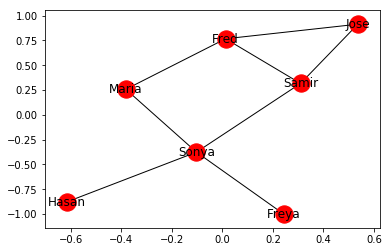

In [24]:
nx.draw_networkx(G, with_labels = True)
# The X and Y are not the weights. It is just the package using algorithms to decide where to put them. 

# Make a Weighted Network:
* Add weighted edges instead of unweighted edges
* Stores weight attribute in the edges
* Can also store node attributes

In [25]:
G_weighted = nx.Graph()
G_weighted.add_nodes_from(nodes)
G_weighted.add_weighted_edges_from(edges_weighted)
nx.set_node_attributes(G_weighted,
                       {'Fred':16,
                       'Maria:':15,
                       'Samir':15,
                       'Jose':15,
                       'Sonya':14},
                      'age')

# Make a Directed Network:
* Use a DiGraph object
* Can also use weighted edges
* Stores weight attribute in the edges

In [58]:
G_dir = nx.DiGraph()
G_dir.add_nodes_from(nodes)
G_dir.add_weighted_edges_from(edges_directed)
nx.set_node_attributes(G_dir,
                       {'Fred':16, 'Maria:':15,
                       'Samir':15,'Jose':15,
                       'Sonya':14}, 'age')
# Graph object vs. Di Graph Object is Undirected Weighted vs. Directed Weighted 

# View Your Data: 
* Friends are no longer symmetrical

In [59]:
print(G_dir['Samir'])
print(G_dir['Jose'])
G_dir

{'Jose': {'weight': 3}, 'Sonya': {'weight': 5}, 'Fred': {'weight': 4}}
{'Fred': {'weight': 6}, 'Samir': {'weight': 3}}


# View Your Data:
* View node attributes
* View weights

In [34]:
G_dir.nodes['Samir']['age']

15

In [35]:
G_dir['Samir']['Fred']['weight']

4

# Make a Bipartite Network:
* <b>Two node sets</b>
* Edges between node sets
* No edges within node sets

In [60]:
G_bi = nx.Graph()
G_bi.add_nodes_from(['Georgetown',
                     'George Mason',
                     'George Washington'],
                   bipartite = 0)
G_bi.add_nodes_from(['Fred','Jose',
                    'Ayesha','Sara',
                    'Bethany','Bobathy'],
                    bipartite = 1
                   )
# If it is equal to 0 it is first set of nodes and 1 is second set of nodes
# Bipartite means no ties between nodes within a set (i.e. Fred can be connected to Georgetown but not to Jose)

# Make a Bipartite Network:
* Two node sets
* <b>Edges between node sets</b>
* <b>No edges within node sets</b>

In [61]:
G_bi.add_edges_from([('Georgetown','Fred'),
                    ('Georgetown','Jose'),
                     ('Georgetown','Ayesha'),
                     ('George Washington','Fred'),
                    ('George Washington','Jose'),
                    ('George Washington','Sara'),
                     ('George Mason','Bethany'),
                     ('George Mason','Bobathy')
                    ])

# Project to unipartite
* Ties between universities that admitted the same students
* Bipartite set treated as attribute label

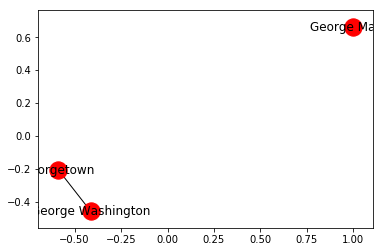

In [62]:
schools = []
for node, data in G_bi.nodes(data=True):
    if data['bipartite']==0:
        schools.append(node)
G_schools = nx.bipartite.projected_graph(G_bi, schools)
nx.draw_networkx(G_schools, with_labels=True)

# Maybe network of journalists to ask how the journalists are related to each other
# Everyone who follows the journalists and the journalists might be a way to group them for example

# First the graph and then the list of nodes

# Make G_bi a weighted graph

In [63]:
G_bi.add_weighted_edges_from([('Georgetown','Fred', 10000),
                    ('Georgetown','Jose', 0),
                     ('Georgetown','Ayesha', 20000),
                     ('George Washington','Fred', 7000),
                    ('George Washington','Jose', 1000),
                    ('George Washington','Sara', 0),
                     ('George Mason','Bethany', 30000),
                     ('George Mason','Bobathy', 0)
                    ])

# Back to the Friendship Network
* Who is most popular? 
* Who is most powerful? 
* Why?

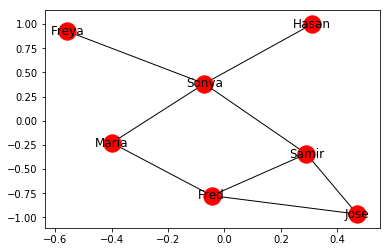

In [64]:
nx.draw_networkx(G)

# Centrality
* Way to measure the nature of the connectedness of a group
* Many centrality measures
* Use theory to pick one. 

#### Some common measures:

# Degree Centrality
* Number of ties, or normalized number of ties
* Sum of rows
* In-degree: number of edges to a node 
* Out-degree: number of edges from a node
* When? 

In [72]:
deg = nx.degree_centrality(G)
print(deg)

{'Fred': 0.5, 'Maria': 0.3333333333333333, 'Samir': 0.5, 'Jose': 0.3333333333333333, 'Sonya': 0.6666666666666666, 'Freya': 0.16666666666666666, 'Hasan': 0.16666666666666666}


# Eigenvector Centrality
* Connectedness to other well-connected nodes (Doesn't have to be directly connected to each other, but can't have two networks)
* Theoretical Implication: A lot of work to maintain ties to everyone, sometimes just as good to know someone who knows everyone.
 * Finding a job
 * Rumors
 * Supply
 * This is more about having the right connection (Sonya who gets all the gossip) versus the most (i.e. I'm popular and friends with everyone)
 * Eigenvector centrality can be really valuable in supply networks 

* Requires connected network
* Cannot compare across networks
* Can be used to measure flow 
* Let's say there is a 1 in the diagonal that is the guy with a disease, and then everyone in the next period connected to that guy gets it, then the people connected to those people get it and so on
* Eigenvector will tell you who in a trade network is in a really good way to profit 
* Diffusion matrix - How many hours of the day to you spend together
* Influencer networks (you'll think what I say is cool)

### When might eigenvector centrality be less useful? 

# Calculating Eigenvector Centrality
* Take eigenvector for maximum eigenvalue
* nx.eigenvector_centrality uses a different method that usually converges to the same result, but sometimes errors. 

In [71]:
eig_c = nx.eigenvector_centrality_numpy(G)
toy_adj = nx.adjacency_matrix(G)
print(eig_c)
val,vec = np.linalg.eig(toy_adj.toarray())
print(val)
vec[:,0]

# So this is telling you where the resources will pool and where influence, so not the most nodes (that's degree centrality)
# Degree centrality matters for meeting constituents but maybe Eigenvector Centrality is better for fundraising

{'Fred': 0.4667289595375909, 'Maria': 0.354956626319124, 'Samir': 0.4959894828189833, 'Jose': 0.3684765011919249, 'Sonya': 0.4606661098595258, 'Freya': 0.17631804784296695, 'Hasan': 0.17631804784296712}
[ 2.6126997   1.34352222 -2.29002215  0.28331905 -1.24305532 -0.70646349
  0.        ]


array([-0.46672896, -0.35495663, -0.49598948, -0.3684765 , -0.46066611,
       -0.17631805, -0.17631805])

# Betweenness Centrality
* Proportional to the number of shortest paths that pass through a given node
* How important is that node in connecting other nodes

In [69]:
betw = nx.betweenness_centrality(G)
print(betw)
# Shortest path through a given node - What percentage of nodes pass through a given node
# Who is most likely to connect two distinct parts of the network

{'Fred': 0.1, 'Maria': 0.1, 'Samir': 0.3, 'Jose': 0.0, 'Sonya': 0.6333333333333333, 'Freya': 0.0, 'Hasan': 0.0}


# Centrality Measures Are Different
* Select based on theory you want to capture
* Correlation between measures differs across networks
* Take a minute to play around with the network and see how the relationships change

In [73]:
cent_scores = pd.DataFrame({'deg':deg,'eig_c':eig_c,'betw':betw})
print(cent_scores.corr())
cent_scores

# Sonya

           betw       deg     eig_c
betw   1.000000  0.860781  0.628927
deg    0.860781  1.000000  0.914429
eig_c  0.628927  0.914429  1.000000


,betw,deg,eig_c
Fred,0.100000,0.500000,0.466729
Freya,0.000000,0.166667,0.176318
Hasan,0.000000,0.166667,0.176318
Jose,0.000000,0.333333,0.368477
Maria,0.100000,0.333333,0.354957
Samir,0.300000,0.500000,0.495989
Sonya,0.633333,0.666667,0.460666


# Difference in Measures
* Sonya has the most friends
* Sonya's friends are not as well connected, lowering her eigenvector centrality
* Fred and Samir have better connected friends
* Hasan and Freya have no connection to the others except through Sonya, giving her high betweenness

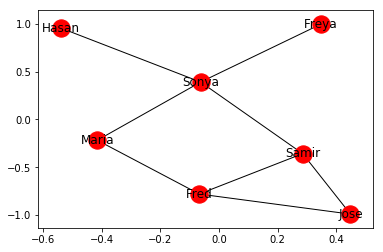

In [75]:
nx.draw_networkx(G)
# What percentage of paths go through Samir? That % is his betweeness centrality. 

# Florentine Marriage Networks
* Families in this graph are connected when there are marriage ties between them
* Calculate the centrality scores
* Who is the most powerful? 

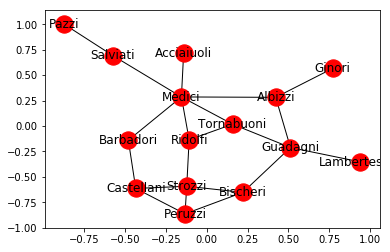

In [76]:
florentine = nx.generators.social.florentine_families_graph()
nx.draw_networkx(florentine)

# Being connected with people who aren't connected to others means higher betweeness.

# Florentine Centrality

In [87]:
deg = nx.degree_centrality(karate)
betw = nx.betweenness_centrality(karate)
eigc = nx.eigenvector_centrality(karate)
cent_scores = pd.DataFrame({'deg':deg,'eig_c':eigc,'betw':betw})
cent_scores.sort_values(['deg','eig_c','betw'])
# 27 in very dense neighborhood not as much with 5 and 6
# Eigenvector may be better correlayed with degree because we have a lot of triangles (i.e. clustering)
# We did for karate above

,betw,deg,eig_c
11,0.000000,0.030303,0.052854
16,0.000000,0.060606,0.023635
26,0.000000,0.060606,0.075582
12,0.000000,0.060606,0.084252
17,0.000000,0.060606,0.092397
21,0.000000,0.060606,0.092397
14,0.000000,0.060606,0.101406
15,0.000000,0.060606,0.101406
18,0.000000,0.060606,0.101406
20,0.000000,0.060606,0.101406


# Florentine Centrality
* Which measure best captures Medici power? Why?
* What's up with Guadagni's betweenness vs Stozzi?
* Why does Strozzi have high eigenvector centrality?

# Karate Club Graph
* Compare 0 and 32/33
 * Shared influence
* Compare 5/6 with 27/28
 * Neighborhood density
* Why is eigenvector better correlated with degree here than in our friend graph?
 * Triangles!

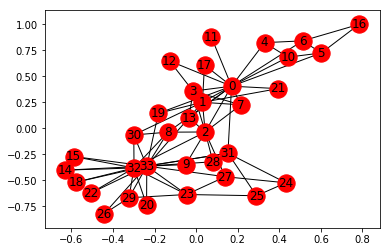

In [79]:
karate = nx.generators.social.karate_club_graph()
nx.draw_networkx(karate)

# Karate Club Graph
* Compare 0 and 32/33
 * Shared influence
* Compare 5/6 with 27/28
 * Neighborhood density
* Why is eigenvector better correlated with degree here than in our friend graph?
 * Triangles!

In [88]:
karate_scores = pd.DataFrame({'deg':deg,'eig_c':eigc,'betw':betw})
print(karate_scores.corr())
karate_scores


           betw       deg     eig_c
betw   1.000000  0.914643  0.803213
deg    0.914643  1.000000  0.917255
eig_c  0.803213  0.917255  1.000000


,betw,deg,eig_c
0,0.437635,0.484848,0.355483
1,0.053937,0.272727,0.265954
2,0.143657,0.303030,0.317189
3,0.011909,0.181818,0.211174
4,0.000631,0.090909,0.075966
5,0.029987,0.121212,0.079481
6,0.029987,0.121212,0.079481
7,0.000000,0.121212,0.170955
8,0.055927,0.151515,0.227405
9,0.000848,0.060606,0.102675


# Speaking of triangles: Transitivity
* Extent to which friends have friends in common
* Probability two nodes are tied given that they have a partner in common
* Make a more transitive network: 

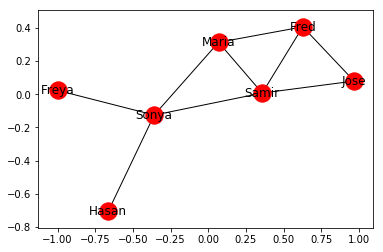

In [89]:
G_trans = G.copy()
G_trans.add_edges_from([('Samir','Maria')])
nx.draw_networkx(G_trans)

# Transitivity
* Extent to which friends have friends in common
* Probability two nodes are tied given that they have a partner in common
### Look at transitivity and triangles in the two networks

In [90]:
print("Transitivity:")
print(nx.transitivity(G))
print(nx.transitivity(G_trans))
print("Triangles:")
print(nx.triangles(G))
print(nx.triangles(G_trans))
# It serves as a measure of embeddedness - Individual partnerships doesn't mean everyone will come to your aid if you need it 

Transitivity:
0.21428571428571427
0.47368421052631576
Triangles:
{'Fred': 1, 'Maria': 0, 'Samir': 1, 'Jose': 1, 'Sonya': 0, 'Freya': 0, 'Hasan': 0}
{'Fred': 2, 'Maria': 2, 'Samir': 3, 'Jose': 1, 'Sonya': 1, 'Freya': 0, 'Hasan': 0}


# Clustering Coefficient
* Individual Nodes:
 * Proportion of possible triangles through a given node
* Whole Network
 * Average clustering across whole network

In [91]:
print("Clustering coefficient")
print(nx.clustering(G))
print(nx.clustering(G_trans))
print("Average Clustering")
print(nx.average_clustering(G))
print(nx.average_clustering(G_trans))

Clustering coefficient
{'Fred': 0.3333333333333333, 'Maria': 0, 'Samir': 0.3333333333333333, 'Jose': 1.0, 'Sonya': 0, 'Freya': 0, 'Hasan': 0}
{'Fred': 0.6666666666666666, 'Maria': 0.6666666666666666, 'Samir': 0.5, 'Jose': 1.0, 'Sonya': 0.16666666666666666, 'Freya': 0, 'Hasan': 0}
Average Clustering
0.23809523809523808
0.4285714285714285


# Which is more clustered? Florentine or Karate?
* Calculate their clustering

In [95]:
nx.average_clustering(florentine)
nx.average_clustering(karate)

# Karate is much more clustered (0.57 vs. .16)
# Different structures are produced by different behaviors and visa versa 

0.5706384782076823

# Why are they different?

# Different Structures Are Produced by and Produce Different Behaviors
* Triadic closure -> transitivity on friendship network
* Less redundancy in strategic Medicci marriage contracts. Triangles inefficient
* Clustering captures tendency toward closure globally. What might it miss? 

# What might we miss?

0.0

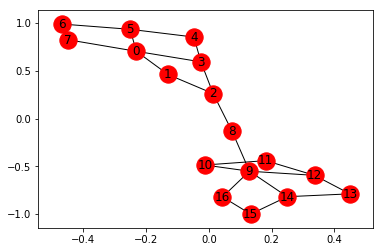

In [97]:
squares = nx.Graph()
se = [(0,1),(1,2),(2,3),(3,0),(0,5),(4,5),(3,4),
    (5,6),(6,7),(7,0),(2,8),(8,9)]
se2 = [(i[0]+9,i[1]+9) for i in se[:-2]]
se.extend(se2)
squares.add_nodes_from(range(17))
squares.add_edges_from(se)
nx.draw_networkx(squares)
nx.average_clustering(squares)

# If you take the average clustering for each node, the clustering would be 0 because there are no triangles.
# This is some sort of lattice design

# What Can We Do? 
* Count n-cycles. 
   * Count all cycles, keep those below threshold  

In [98]:
nx.cycle_basis(squares)

[[5, 6, 7, 0],
 [3, 4, 5, 0],
 [1, 2, 3, 0],
 [14, 15, 16, 9],
 [12, 13, 14, 9],
 [10, 11, 12, 9]]

# What Can We Do?
* Square clustering
### Intuitive names like clustering are nice, but always know what you're measuring and check if it's appropriate for your network

In [101]:
clustering_coefs = nx.square_clustering(squares).values()
np.mean(list(clustering_coefs))

0.6147058823529411

# Community Detection
* Divide the network into subgroups using different algorithms
* Examples
 * Percolation: find communities with fully connected cores
 * Minimum cuts (nodes): Find the minimum number of nodes that, if removed,  break the network into multiple components. Progressively remove them. 
 * <strong>Girvan Newman Algorithm: </strong> Remove ties with highest betweenness, continue until network broken into desired number of communities 

In [107]:
import itertools
coms = nx.algorithms.community.centrality.girvan_newman(G)
i = 2
for com in itertools.islice(coms,4):
    print(i, ' communities')
    i+=1
    print(tuple(c for c in com))
    
    # Girvan Newman breaks into two piece, removes high betweeness until it breaks off a third piece, and then does the same for a fourth break, 
    #and iteratively continues making these cuts

2  communities
({'Jose', 'Fred', 'Samir'}, {'Hasan', 'Maria', 'Sonya', 'Freya'})
3  communities
({'Jose', 'Fred', 'Samir'}, {'Maria'}, {'Hasan', 'Sonya', 'Freya'})
4  communities
({'Jose', 'Fred', 'Samir'}, {'Maria'}, {'Hasan', 'Sonya'}, {'Freya'})
5  communities
({'Fred'}, {'Maria'}, {'Jose', 'Samir'}, {'Hasan', 'Sonya'}, {'Freya'})


# Why Detect Communities
* Learn something about how an unknown network is organized
* Generate hypotheses. 
 * Why did these communities emerge? 
 * How do these communities affect the behavior of members?
 * How do they relate to attributes of the members? 
 * How do they evolve over time, how do different networks compare?
 
#### What are some examples? 

# Assessing Community Detection:
* Density: Number of ties / maximum number
* Maximum number of ties: Every node in network has a tie
* Modularity: Fraction of edges within a group / expected edges in random graph
    * Is the density within each community greater than a random network generated with the same density of the overall network

In [108]:
nx.density(G)

0.38095238095238093

# Preview: Random Graphs
* Different methods to capture different properties
* Compare random graph with desired properties to real graph
* Today: Erdos-Renyi Graph
    * Takes all possible edges
    * Each edge has a probability p of being realized
    * Produces graph with desired average density
    * Does not capture other properties common in real world graphs
#### More next week!

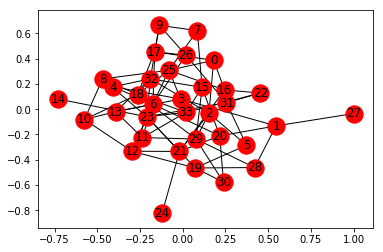

In [113]:
G_rand = nx.gnp_random_graph(len(karate.nodes),
                             nx.density(karate))
nx.draw_networkx(G_rand)
# Each edge has a probability p of exsiting or not. 
# If you are tring to do network inference, you'd use a random network 
# Is the clustering more clustering than we would expect on average? 

# Modularity and Random Graphs
* Compare number of ties within community to expected number if the graph were an Erdos Renyi Graph

In [112]:
nx.average_clustering(karate)

0.5706384782076823

In [114]:
nx.average_clustering(G_rand)

0.0843370681605976

# Compare the clustering visually:

(array([18.,  3.,  4.,  5.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 10 Patch objects>)

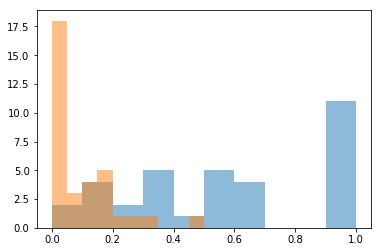

In [115]:
#View clusters
plt.hist(list(nx.clustering(karate).values()), alpha = .5)
plt.hist(list(nx.clustering(G_rand).values()), alpha = .5)

# Compare the clustering in florentine to a random network
* How do they differ?

(array([9., 2., 0., 1., 0., 0., 1., 0., 0., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

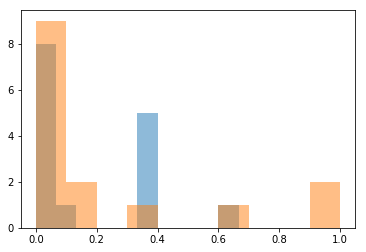

In [118]:
G_rand = nx.gnp_random_graph(len(florentine.nodes),
                             nx.density(florentine))
# nx.draw_networkx(G_rand)
plt.hist(list(nx.clustering(florentine).values()), alpha = .5)
plt.hist(list(nx.clustering(G_rand).values()), alpha = .5)

# Modularity Based Performance Measurement
* Modularity: Fraction of edges within group - expected number of edges
* Networkx performance metric: 
    * (Number of edges within groups - Number of edges between groups)/(Total Edges)


In [119]:
coms = nx.algorithms.community.centrality.girvan_newman(squares)
for com in itertools.islice(coms,1):
    partition = tuple(list(c) for c in com)
nx.algorithms.community.quality.performance(squares,partition)

0.6764705882352942

# Compare the insularity of the communities in the florentine and karate networks
* Why is it that so?

In [ ]:
# Your Code Here

# Visualizing the networks
* Matplotlib package, imported as plt
  * %matplotlib inline magic to make it plot in the notebook

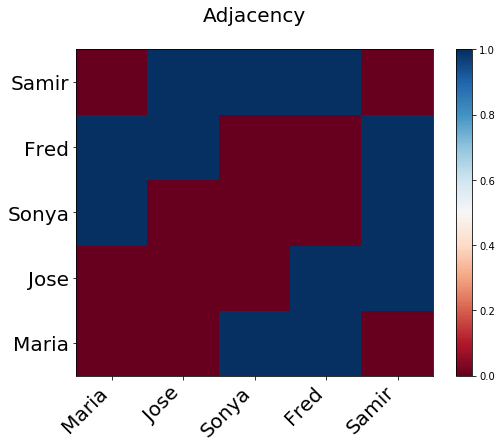

In [120]:
order = adj_labeled.sum().sort_values().index
adj_labeled = adj_labeled.loc[order,order]
plt.figure(figsize = (8,6))
plt.pcolor(adj_labeled,cmap=plt.cm.RdBu)
plt.yticks(np.arange(0.5, 5, 1), adj_labeled.index, fontsize = 20)
plt.xticks(np.arange(0.5, 5, 1), adj_labeled.columns, rotation =45, ha='right', fontsize=20 )
plt.title('Adjacency\n',fontsize=20)
cbar =plt.colorbar()

# This is vizualizing the adjacency matrix, which can help you start to identify clusters. This is harder to view in network because it
# just gets all cluttered

# Graph Plotting Algorithms
* Can learn something by placing the nodes in an intelligent way
* Force Algorithm: Put nodes that are connected closer together

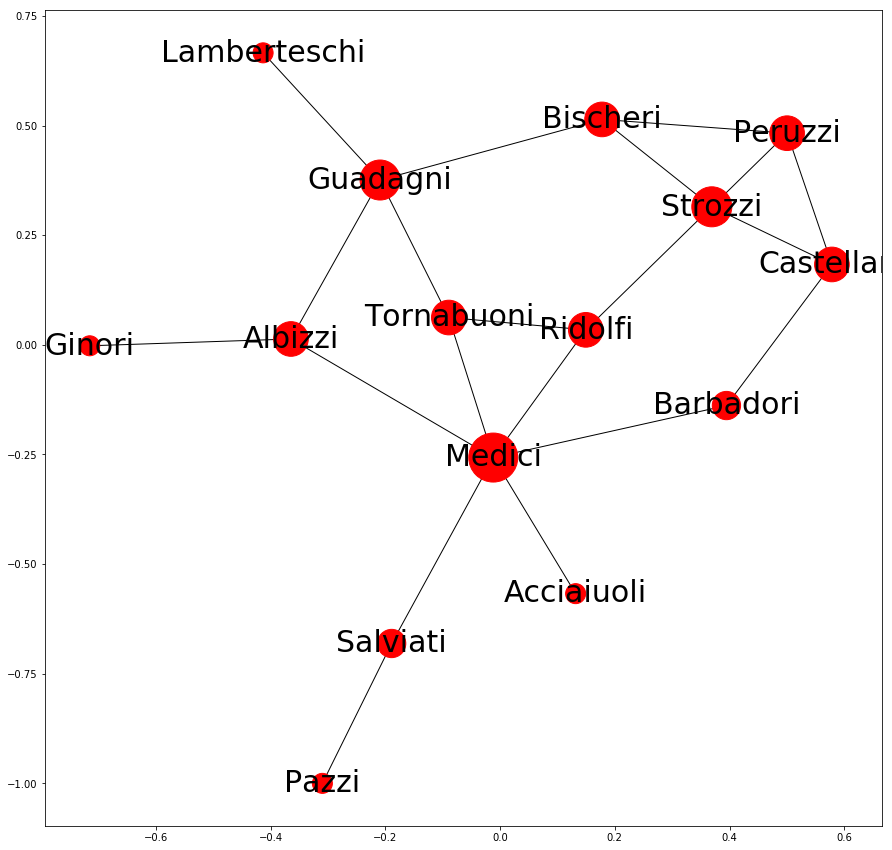

In [121]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(florentine)
deg = nx.degree(florentine)
deg = [deg[k]*400 for k in florentine.nodes]
nx.draw_networkx(florentine,pos=pos, with_labels=True,
                node_size=deg,font_size=30)

# There are different algorithms used for positioning things in different places 
# Set figure size, and then positions using the spring layout
# We also order the size by degree

# Add Color

In [122]:
plt.figure(figsize=(15,15))
colors = []
for n in florentine.nodes:
    if n in fl_partition[0]:
        colors.append('blue')
    else:
        colors.append('red')
nx.draw_networkx(florentine,pos=pos, with_labels=True,
                node_size=deg,font_size=30, node_color = colors)

NameError: name 'fl_partition' is not defined

<Figure size 1080x1080 with 0 Axes>

# Draw the Florentine Network with Three Partitions

In [3]:
# Your Code Here

# Next Time: Making Inferences
* Network Questions
* Network Properties
 * Degree distributions
 * Centralization
* Random Networks
* Regressions with Network Variables